In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### Introduction
In the introduction, we plot just one figure related to papers publication over the years.
We read the Scopus and Web of Science data about the number of papers published with topic **Augmented Reality** and **Education**

In [38]:
df = pd.read_excel('data/update_2023/Publications_Scopus_WoS_2003_2023.xlsx', engine='openpyxl', header=0)
df.head(5)

,Year,SCOPUS,WOS
0,2003,12,17
1,2004,18,13
2,2005,6,18
3,2006,30,27
4,2007,34,36


Now we simply create a lineplot of the numbr of papers over the years

<Figure size 1500x700 with 0 Axes>

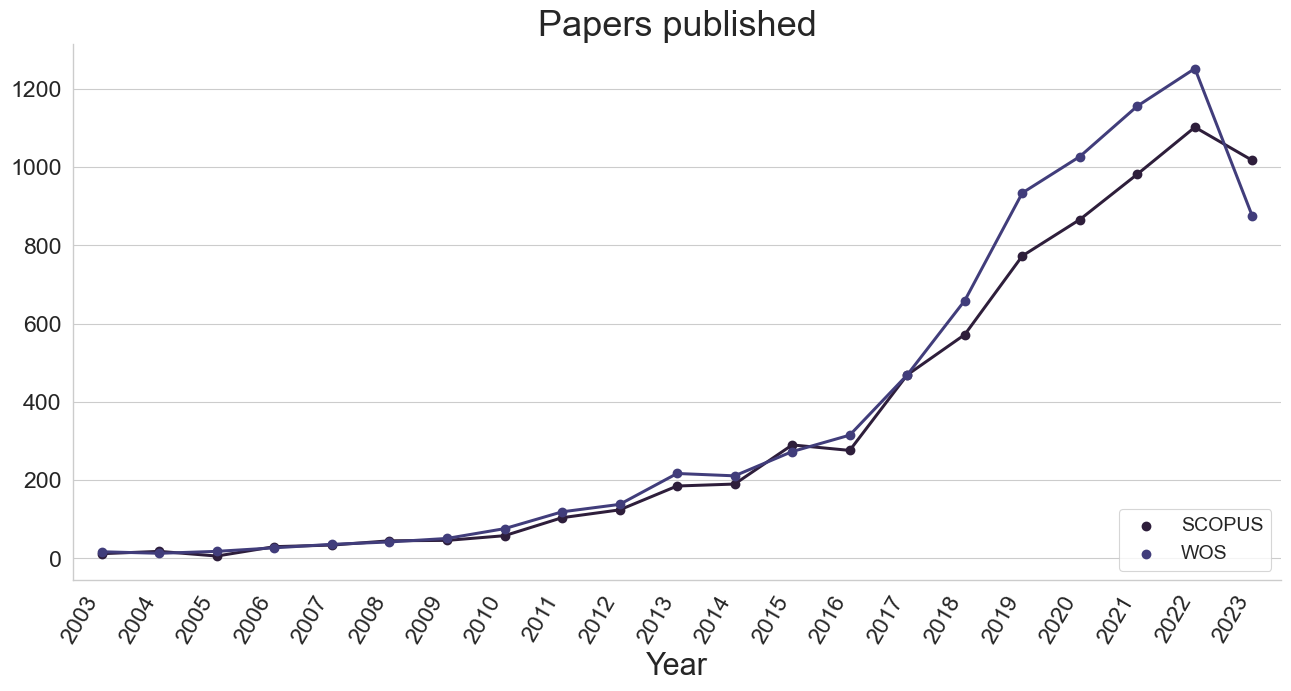

In [39]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.set_style("whitegrid")
sns.despine()
sns.set_palette(sns.color_palette("mako"))
sns.set_context("paper", rc={"axes.titlesize":8,"axes.labelsize":22})

df_melt = df.melt('Year', var_name='Index',  value_name='Papers')
df_melt.head()

g = sns.catplot(x="Year", y="Papers", hue='Index',
            kind='point', height=7, aspect=13/7,
            legend=False, data=df_melt)

plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='normal',
    fontsize='xx-large'
)

plt.yticks(
    fontweight='normal',
    fontsize='xx-large'
)

plt.title("Papers published", size=26)
#g.set(title="Papers publishes")
g.set(ylabel=None)

plt.legend(loc='lower right', prop={'size': 14})
plt.tight_layout()
plt.savefig('figures/update_2023/papers_over_years.svg', dpi=300)

### Results

Here we create the figures for section 3, reading the data from the spreadsheets containing the answers to the Google Form filled by the researchers after reading each paper

In [40]:
df2 = pd.read_excel ('data/update_2023/AR in Education SLR (Responses)_all2023.xlsx', engine='openpyxl',
                     sheet_name='OnlyValid', header=0, nrows=132, usecols='B,C,E:G,I:O,V')
df2.tail()

,Which paper are you reviewing? Please copy-paste the TITLE from the GSheet.,Interesting?,Interactive?,Multi-user?,Collab?,Subject?,AR Tech?,Code available?,HW,SW,Information regarding the number of users who tested the app?,"If you answer was Yes, could you specify how many?",Published?
126,An interactive information system that support...,Yes,Yes,No,No,STEM,"Markerless, Location-based",No,Phone,"Unity, ARCore",Yes,16.0,2021
127,Comparison of Using an Augmented Reality Learn...,No,Yes,No,No,STEM,Marker-based,No,Phone,"Unity, Vuforia",Yes,55.0,2023
128,Evaluation of memory retention among students ...,No,Yes,No,No,STEM,Marker-based,No,"Phone, Tablet","Unity, Vuforia",Yes,54.0,2022
129,MoleculARweb- A Web Site for Chemistry and Str...,Yes,Yes,No,No,STEM,Marker-based,No,PC + webcam,Three.js + A-Frame + AR-js-toolkit,Yes,131.0,2021
130,Open AR-Sandbox- A haptic interface for geosci...,Yes,Yes,Yes,No,STEM,"Markerless, marker-based",Yes,"Projector, Lidar, Kinect","Jupyter Notebooks, Kinect SDK",No,NaN,2022


Before plotting anything, we just compute some numbers to include in the paper, like the number of studies presenting multiuser or collaborative app, as well as the studies published in 2020 or after.

In [41]:
publish_year_col=list(df2['Published?'])
after_2020 = publish_year_col.count(2023) + publish_year_col.count(2022) + publish_year_col.count(2021) + publish_year_col.count(2020)
print(f"Published in 2020 or after = {after_2020}")

multiuser_col = df2["Multi-user?"]
multiuser = multiuser_col[multiuser_col == "Yes"].count()
print(f"Apps with multiuser capabilities = {multiuser}")

collaborative_col = df2["Collab?"]
collaborative = collaborative_col[collaborative_col == "Yes"].count()
print(f"Apps with collaborative capabilities = {collaborative}")

code_available_col = df2["Code available?"]
code_available = code_available_col[code_available_col == "Yes"].count()
print(f"Papers wich published source code of the app = {code_available}")

evaluation_info_col = df2["Information regarding the number of users who tested the app?"]
evaluation_info = evaluation_info_col[evaluation_info_col == "Yes"].count()
print(f"Papers providing info about the number of users who tested the app = {evaluation_info}")

Published in 2020 or after = 53
Apps with multiuser capabilities = 23
Apps with collaborative capabilities = 16
Papers wich published source code of the app = 7
Papers providing info about the number of users who tested the app = 103


As we will be using Seaborn several times to create bar plots, it make sense to define a function that we will call when creating the figures

In [42]:
def create_bar_plot(plot_data, x_label, y_label, out_image_name=None, plot_value=False):
    sns.set(rc={'figure.figsize':(15, 7)})
    sns.set_style("whitegrid")
    sns.despine()
    sns.set_context("paper", rc={"axes.titlesize":16,"axes.labelsize":22})

    g = sns.barplot(x=x_label, y=y_label, data=plot_data, palette="mako")
    
    if plot_value:
        for bars_group in g.containers:
            g.bar_label(bars_group, padding=9, fontsize=18)
        #g.bar_label(g.containers[0], fontsize=18)
        #g.margins(x=0.15)

    plt.xticks( 
        fontweight='normal',
        fontsize='xx-large'
    )

    plt.yticks(
        rotation=30,
        fontweight='normal',
        fontsize='xx-large'
    )
    
    g.set(ylabel=None)
    plt.title(y_label, size=26)

    plt.tight_layout()
    
    if out_image_name:
        plt.savefig(out_image_name, dpi=300)

#### Subjects
We now then proceed to check the subjects covered in the studies analyzed in the review. 

In [43]:
subjects_resp =df2["Subject?"].value_counts()
print(subjects_resp)

Subject?
STEM                                               88
Humanities                                         13
Foreign language                                   10
STEM, Humanities                                    3
PBIS                                                2
Physical education                                  2
Unspecified                                         2
Social skills for ASD children                      1
Foreign Language                                    1
Teaching to ASD children                            1
Emotional intelligence and communication skills     1
3D modeling                                         1
Social interactions                                 1
Sustainability                                      1
Flight simulation                                   1
Physiscal education and Nutrition                   1
Narrative Skills and creativity                     1
Problem solving                                     1
Name: count, dtype:

There is some work to do before plotting. First of all, there are three cases with both STEM and Humanities, we are going to remane them to "Multiple". Another response mixes STEM with a comment (probably an error filling the form. We will remove this entry and add the count to "STEM". Likewise, we will merge "Physical education" with "Physical education and Nutrition". Finally, we will group as "Other" all the remaining entries.


In [44]:
subjects_modified = {"STEM":0, "Humanities":0, "Foreign Language":0, "Physical Education":0,
                     "Multiple":0, "Social Skills": 0, "Other":0, "Unspecified":0}
subjects_dict =  dict(subjects_resp)
subjects_modified["STEM"] = subjects_dict["STEM"]
subjects_modified["Humanities"] = subjects_dict["Humanities"]
subjects_modified["Foreign Language"] = subjects_dict["Foreign language"] + subjects_dict["Foreign Language"]
subjects_modified["Physical Education"] = subjects_dict["Physical education"] + \
                                          subjects_dict["Physiscal education and Nutrition"]
subjects_modified["Multiple"] = subjects_dict["STEM, Humanities"]
subjects_modified["Social Skills"] = subjects_dict["Social skills for ASD children"] + subjects_dict["PBIS"] +\
                                     subjects_dict["Social interactions"] +subjects_dict["Emotional intelligence and communication skills"]
subjects_modified["Unspecified"] = subjects_dict["Unspecified"]
# Just sum together all the others
subjects_modified["Other"] = 6
subjects = pd.DataFrame.from_dict(subjects_modified, orient='index', columns=['Num. of papers'])
subjects.reset_index(inplace=True)
subjects = subjects.rename(columns={"index":"Subject"})
subjects

,Subject,Num. of papers
0,STEM,88
1,Humanities,13
2,Foreign Language,11
3,Physical Education,3
4,Multiple,3
5,Social Skills,5
6,Other,6
7,Unspecified,2


We are now ready to create the visualization. Again, we use Seaborn for this, and we will create an horizontal bar plot.

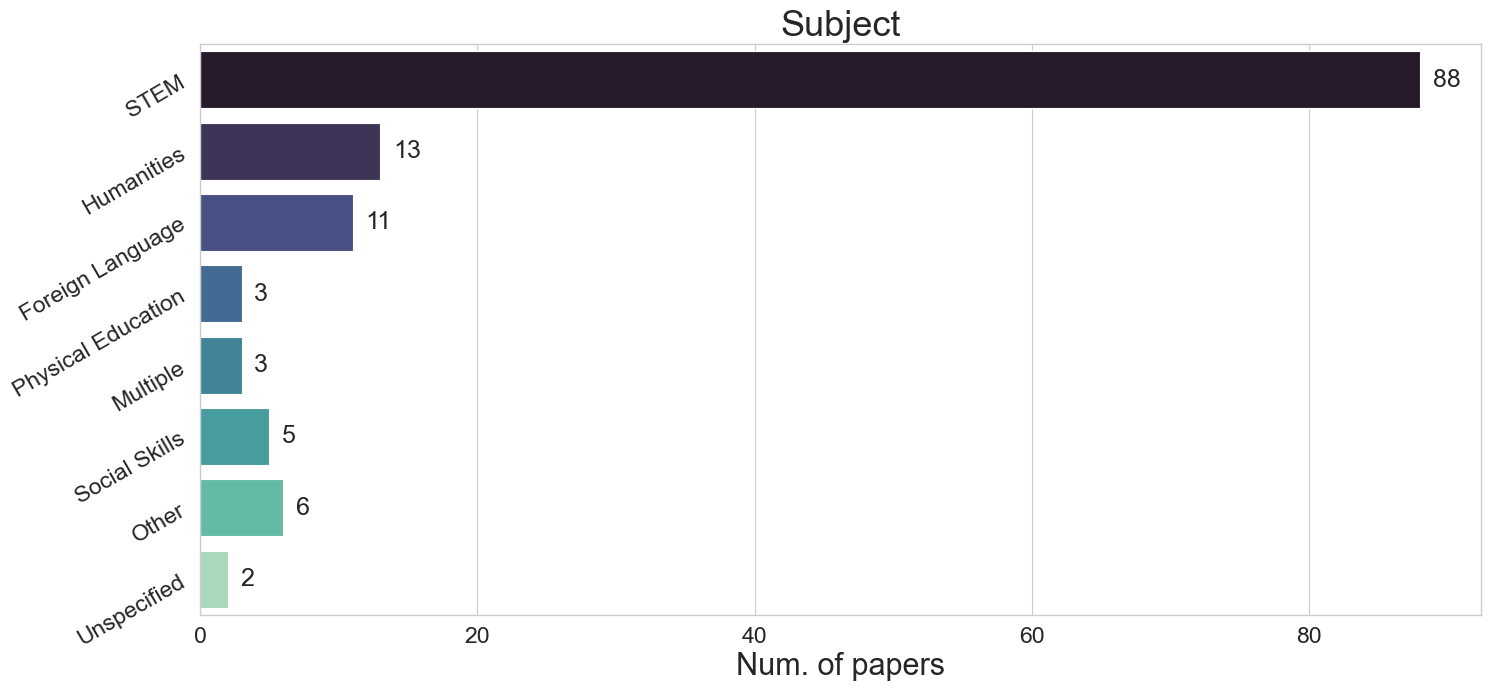

In [45]:
print_bar_val = True
create_bar_plot(subjects, 'Num. of papers', 'Subject', 'figures/update_2023/subjects.svg', print_bar_val)

#### AR Technology
Now we want to do the same, but for the AR technology used

In [46]:
ar_tech_resp = df2["AR Tech?"].value_counts()
print(ar_tech_resp)

AR Tech?
Marker-based                                                                            89
Unspecified                                                                             10
Markerless (plane detection, user clicks to add 3d content, ...)                         9
Marker-based, Location based (GPS, bluetooth, wi-fi, accelerometer, ...)                 4
Object recognition                                                                       4
Makey Makey boards used to command new projections                                       3
Marker-based, Object recognition                                                         3
Location based (GPS, bluetooth, wi-fi, accelerometer, ...)                               2
It is more an immersive solution with projectors                                         1
Marker-based, Markerless (plane detection, user clicks to add 3d content, ...)           1
Markerless (plane detection, user clicks to add 3d content, ...), Object recognit

And similar to what we did for the subjects, we will group the values where appropriate

In [47]:
ar_tech_modified = {"Marker based":0, "Markerless":0, "Location based":0, "Object recognition":0,
                     "Multiple":0, "Other":0, "Unspecified":0}
ar_tech_dict =  dict(ar_tech_resp)
ar_tech_modified["Marker based"] = ar_tech_dict["Marker-based"]
ar_tech_modified["Markerless"] = ar_tech_dict["Markerless (plane detection, user clicks to add 3d content, ...)"] + ar_tech_dict["Markerless"]
ar_tech_modified["Location based"] = ar_tech_dict["Location based (GPS, bluetooth, wi-fi, accelerometer, ...)"] + ar_tech_dict["Location based"]
ar_tech_modified["Object recognition"] = ar_tech_dict["Object recognition"]
ar_tech_modified["Multiple"] = ar_tech_dict["Marker-based, Object recognition"] + ar_tech_dict["Markerless, Location-based"] +\
                               ar_tech_dict["Marker-based, Markerless (plane detection, user clicks to add 3d content, ...)"] + \
                               ar_tech_dict["Marker-based, Location based (GPS, bluetooth, wi-fi, accelerometer, ...)"] +\
                               ar_tech_dict["Markerless, marker-based"] +\
                               ar_tech_dict["Markerless (plane detection, user clicks to add 3d content, ...), Object recognition"]
ar_tech_modified["Unspecified"] = ar_tech_dict["Unspecified"]
# Just sum together all the others
ar_tech_modified["Other"] = ar_tech_dict["Makey Makey boards used to command new projections"] + \
                            ar_tech_dict["It is more an immersive solution with projectors"]

ar_tech = pd.DataFrame.from_dict(ar_tech_modified, orient='index', columns=['Num. of papers'])
ar_tech.reset_index(inplace=True)
ar_tech = ar_tech.rename(columns={"index":"AR technology"})
ar_tech

,AR technology,Num. of papers
0,Marker based,89
1,Markerless,10
2,Location based,3
3,Object recognition,4
4,Multiple,11
5,Other,4
6,Unspecified,10


We just have to create the visualization. We keep using seaborn with the same parameters

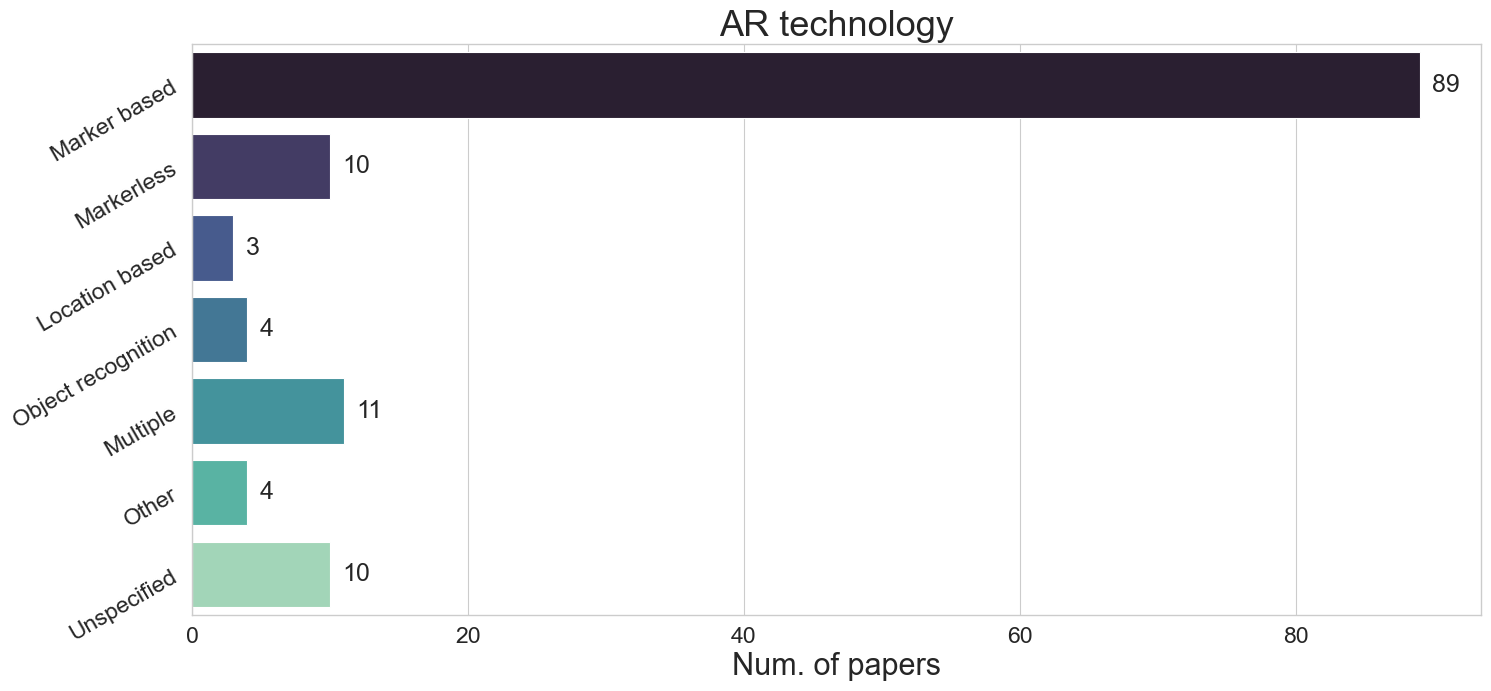

In [48]:
create_bar_plot(ar_tech, 'Num. of papers', 'AR technology', 'figures/update_2023/AR_technology.svg', print_bar_val)

#### Hardware supported
We repeat the same process, this time to creat a visualization of the hardware on which the AR applications run.

In [49]:
hardware_resp = df2["HW"].value_counts()
print(hardware_resp)

HW
Phone                                                                              58
Tablet                                                                             28
Phone, Tablet                                                                      15
Head mounted display                                                                6
PC + webcam                                                                         4
Projector                                                                           3
PC                                                                                  2
Smart glasses, Projector                                                            1
Projector, Makey Makey boards, Kinect                                               1
PC with special keyboard with Braille display                                       1
Projector, Kinect                                                                   1
Projector, PC + Depth camera                       

Unlike what we did for the previous two plots, in this case (and in the next) we can have that the sum of the elements is bigger than 131, as different apps can support multiple devices (for example, an app could have been tested on both tablet and smartphones)

In [50]:
hardware_modified = {"Smartphone":0, "Tablet":0, "Projector":0,
                     "PC":0, "HMD":0, "Other":0}
hardware_dict =  dict(hardware_resp)
hardware_modified["Tablet"] = hardware_dict["Tablet"] + hardware_dict["Phone, Tablet"] + \
                              hardware_dict["Tablet, Projector"]

hardware_modified["Smartphone"] = hardware_dict["Phone"] + hardware_dict["Phone, Tablet"] + \
                             hardware_dict["Phone, Arcades"]

hardware_modified["HMD"] = hardware_dict["Head mounted display"] + \
                           hardware_dict["Smart glasses, Head mounted display, optical see-though displays; projected AR"] + \
                           hardware_dict["Smart glasses, Projector"]

# For projector and PC we manually sum. PC includes also setups with Kinect and webcam
hardware_modified["Projector"] = 3 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1
hardware_modified["PC"] = 4 + 2 + 1 + 1 + 1 + 1
# Other includes Makey makey boards and specialized hardware (Leap motion, fish-eye cam, braille display, arcades)
hardware_modified["Other"] = 1 + 1 + 1 + 1 + 1 + 1 + 1

hardware = pd.DataFrame.from_dict(hardware_modified, orient='index', columns=['Num. of papers'])
hardware.reset_index(inplace=True)
hardware = hardware.rename(columns={"index":"Hardware supported"})
hardware

,Hardware supported,Num. of papers
0,Smartphone,74
1,Tablet,44
2,Projector,11
3,PC,10
4,HMD,8
5,Other,7


And again we call the function to create our plot

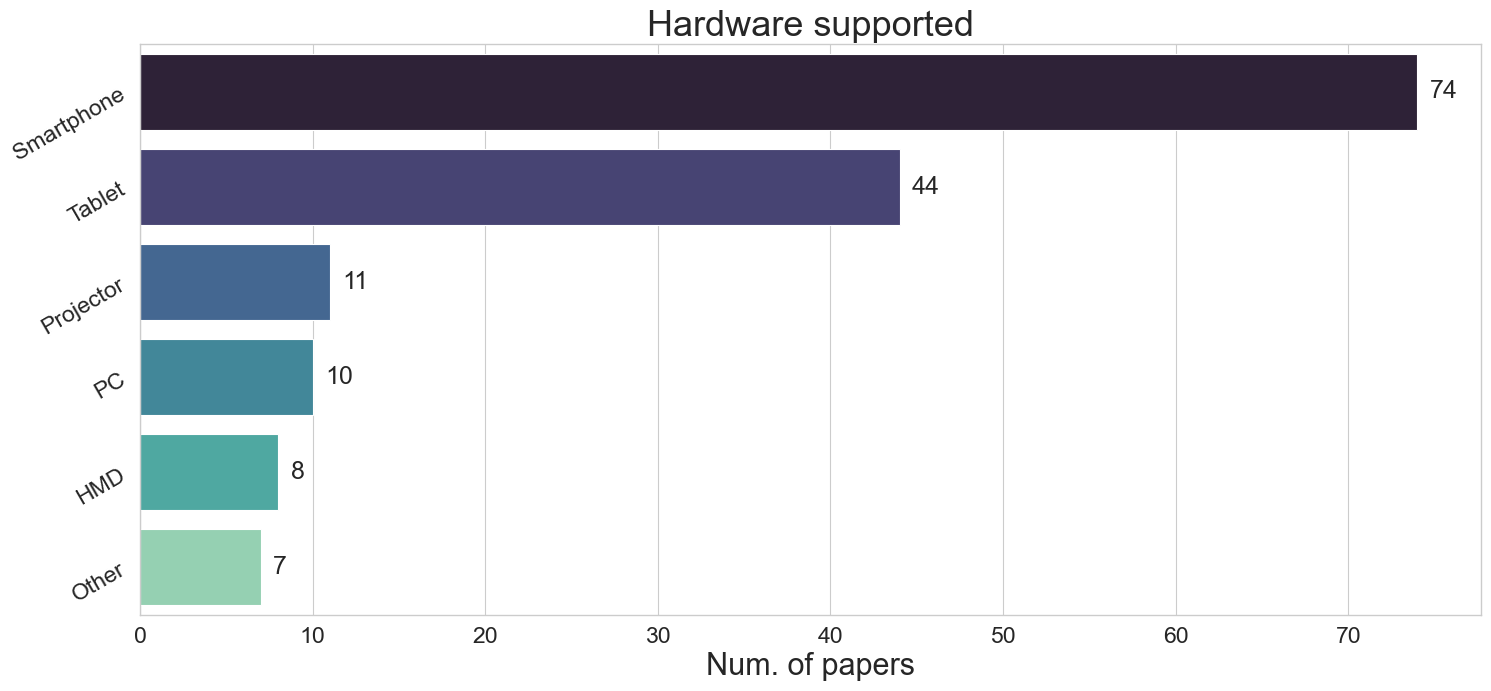

In [51]:
create_bar_plot(hardware, 'Num. of papers', 'Hardware supported', 'figures/update_2023/Hardware_supported.svg', print_bar_val)

#### Software used for development
The last bar plot we are going to create is about the sofftware used to develop the AR applications

In [52]:
software_resp = df2["SW"].value_counts()
print(software_resp)

SW
Unity, Vuforia                                                                                                                                                                                                       41
Unspecified                                                                                                                                                                                                          37
Vuforia                                                                                                                                                                                                               5
Unity                                                                                                                                                                                                                 4
Unity, ARCore                                                                                                                        

Again, in this case we can have that the same app used multiple software frameworks and libraries for development, so the total is greater than the number of papers we reviewed

In [53]:
software_modified = {"Unity":0, "Vuforia":0, "ARCore":0, "ARKit":0, "CV Library":0, "DL Framework":0,
                     "MIT Scratch":0, "AR Toolkit":0, "Other":0, "Unspecified":0}
software_dict =  dict(software_resp)
software_modified["Unity"] = software_dict["Unity"] +\
                             software_dict["Unity, Vuforia"] + \
                             software_dict["Unity, Meta One SDK"] +\
                             software_dict["Unity, Vuforia, OpenGL ES"] +\
                             software_dict["Unity, ARCore"] +\
                             software_dict["Unity, ARKit"] + \
                             software_dict["Unity, IBM Watson API"] +\
                             software_dict["Unity, PUN, Placenote"] +\
                             software_dict["Unity, Microsoft Mixed Reality Toolkit"] +\
                             software_dict["Unity, AR Foundation, ARCore"] +\
                             software_dict["Unity, Wikitude"] +\
                             software_dict["Unity, AR Foundation"] +\
                             software_dict["Unity, MirageXR"] +\
                             software_dict["Unity, Kinect"]

software_modified["Vuforia"] = software_dict["Vuforia"] +\
                               software_dict["Unity, Vuforia"] + \
                               software_dict["Unity, Vuforia, OpenGL ES"] + \
                               software_dict["Vuforia, A Computer vision library (OpenCV, Halcon, EasyCV, PCL, Dlib, ...)"]

software_modified["ARCore"] = software_dict["ARCore"] +\
                              software_dict["Unity, ARCore"] + \
                              software_dict["ARCore, A DeepLearning framework (PyTorch, Tensorflow, Caffe, Theano, ...), Cloud Vision API"] +\
                              software_dict["Unity, AR Foundation, ARCore"]

software_modified["ARKit"] = software_dict["ARKit"] + software_dict["Unity, ARKit"]

software_modified["CV Library"] = software_dict["A Computer vision library (OpenCV, Halcon, EasyCV, PCL, Dlib, ...)"] + \
    software_dict["A Computer vision library (OpenCV, Halcon, EasyCV, PCL, Dlib, ...), ROS"] + \
    software_dict["A Computer vision library (OpenCV, Halcon, EasyCV, PCL, Dlib, ...), ARToolkit"] + \
    software_dict["Vuforia, A Computer vision library (OpenCV, Halcon, EasyCV, PCL, Dlib, ...)"] + \
    software_dict["A Computer vision library (OpenCV, Halcon, EasyCV, PCL, Dlib, ...), Java 3D"]

software_modified["DL Framework"] = 1

software_modified["MIT Scratch"] = 1 + 1
software_modified["AR Toolkit"] = 2 + 1 + 1

software_modified["Other"] = 22
software_modified["Unspecified"] = software_dict["Unspecified"]

software = pd.DataFrame.from_dict(software_modified, orient='index', columns=['Num. of papers'])
software.reset_index(inplace=True)
software = software.rename(columns={"index":"Software used"})
software

,Software used,Num. of papers
0,Unity,62
1,Vuforia,49
2,ARCore,7
3,ARKit,2
4,CV Library,6
5,DL Framework,1
6,MIT Scratch,2
7,AR Toolkit,4
8,Other,22
9,Unspecified,37


And here's the plot for the software used

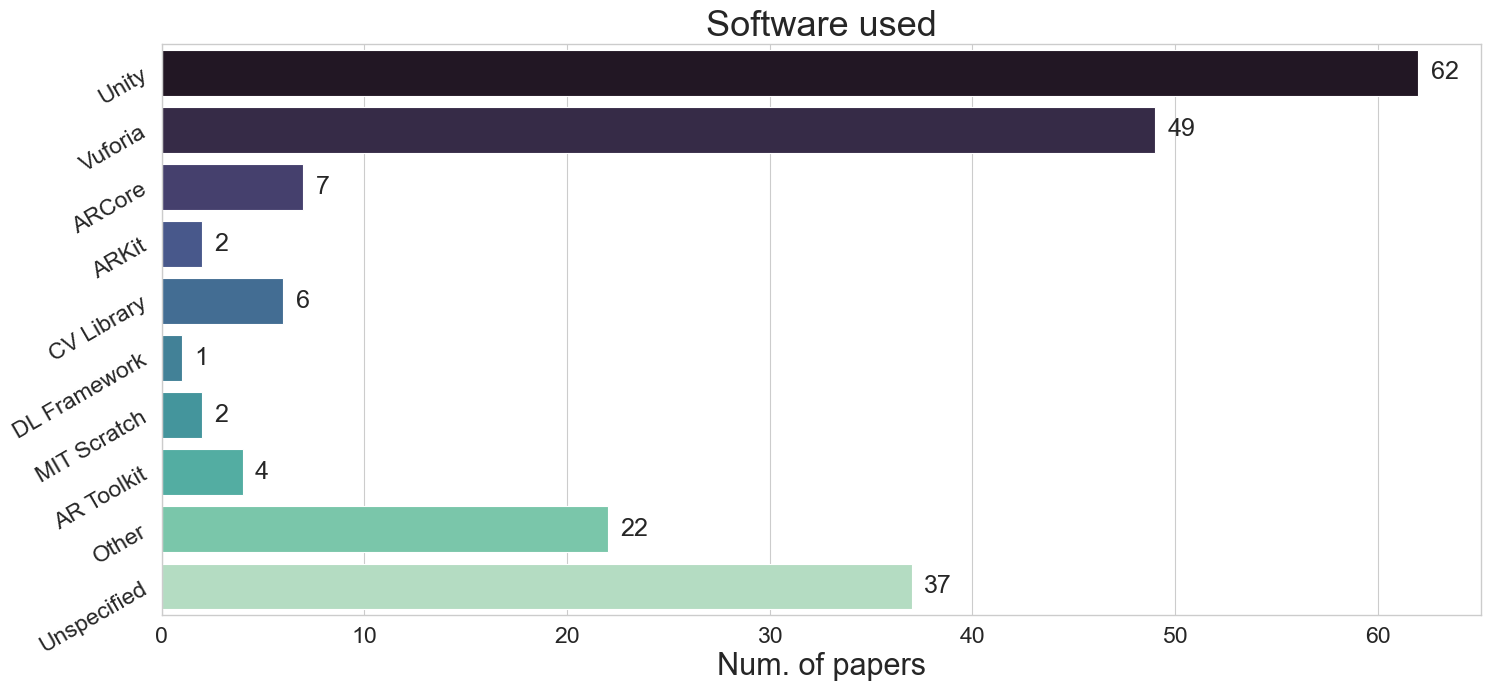

In [54]:
create_bar_plot(software, 'Num. of papers', 'Software used', 'figures/update_2023/Software_used.svg', print_bar_val)

#### Evaluation
The last plot we want to create is the histogram showing the amount of users who tested the application presented by the studies. Many studies do not provide such information, but nonetheless we show the histogram relative to the 77 studies who have this information

In [55]:
testers_resp = df2["If you answer was Yes, could you specify how many?"]
testers_resp

0      290.0
1      137.0
2      111.0
3      106.0
4      102.0
       ...  
126     16.0
127     55.0
128     54.0
129    131.0
130      NaN
Name: If you answer was Yes, could you specify how many?, Length: 131, dtype: float64

We remove all the $NaN$ entries, who refer to the papers without info about evaluation

In [56]:
testers_np = testers_resp.to_numpy()
testers = testers_np[np.isfinite(testers_np)]
len(testers) # Should be 103

103

In [57]:
df3 = pd.DataFrame({'Testers': testers})

<Figure size 1500x700 with 0 Axes>

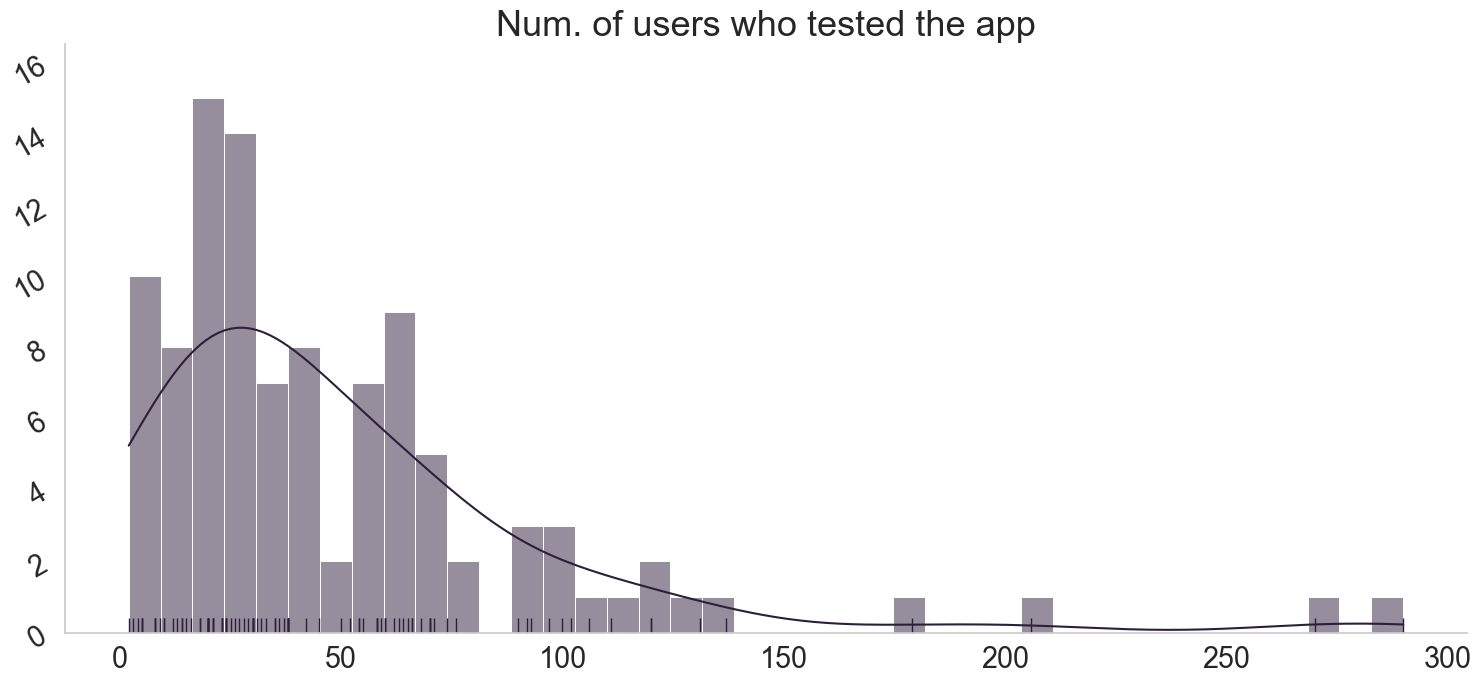

In [58]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine()
sns.set_palette(sns.color_palette("mako"))

g = sns.displot(df3, x="Testers", kind="hist", kde=True, rug=True, bins=40)

plt.xticks( 
    fontweight='normal',
    fontsize='xx-large'
)

plt.yticks(
    rotation=30,
    fontweight='normal',
    fontsize='xx-large'
)

g.set(ylabel=None)
g.set(xlabel=None)
plt.title("Num. of users who tested the app", size=26)

fig = plt.gcf()
fig.set_size_inches( 15, 7)

plt.tight_layout()
plt.savefig('figures/update_2023/hist_testers.svg', dpi=300)